https://github.com/0liu/ISLR/blob/master/Chapter%209%20Support%20Vector%20Machines.ipynb

### data

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import scipy as sp
import pandas as pd

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, roc_curve, auc

# from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use("ggplot")

SVC plot function

In [3]:
def plot_svc(svc, X, response, h = 0.02, pad = 0.25):
  x_min = X[:, 0].min() - pad; x_max = X[:, 0].max() + pad
  y_min = X[:, 1].min() - pad; y_max = X[:, 1].max() + pad
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize = (10, 6))
  plt.scatter(X[:, 0], X[:, 1], s = 70, c = response, cmap = plt.cm.Paired)
  plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.2)

  sv = svc.support_vectors_
  plt.scatter(sv[:, 0], sv[:, 1], c = 'k', marker = 'x', s = 100, linewidths = '1')
  # plt.xlim(x_min, x_max); plt.ylim(y_min, y_max)
  plt.xlabel("X1"); plt.ylabel("X2")
  plt.show()

  print("Number of support vectors:", svc.support_.size)

### SVC: Support Vector Classifier
- bigger C, more support vectors, higher bias, finally lower variance

In [4]:
np.random.seed(5)
X = np.random.randn(20, 2)
y = np.repeat([1, -1], 10)
X[y == -1] = X[y == -1] + 1

기본 모양 확인

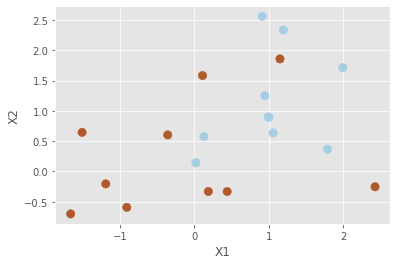

In [5]:
plt.scatter(X[:, 0], X[:, 1], s = 70, c = y, cmap = plt.cm.Paired)
plt.xlabel("X1"); plt.ylabel("X2")
plt.show()

svc (linear kernel)

In [6]:
svc = SVC(kernel = "linear")
svc.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

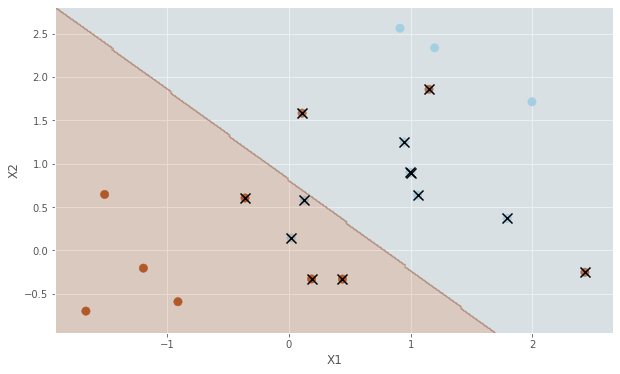

Number of support vectors: 13


In [7]:
plot_svc(svc, X, y)

change C, tuning parameter

In [8]:
svc2 = SVC(C = 0.1, kernel = "linear")
svc2.fit(X, y)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

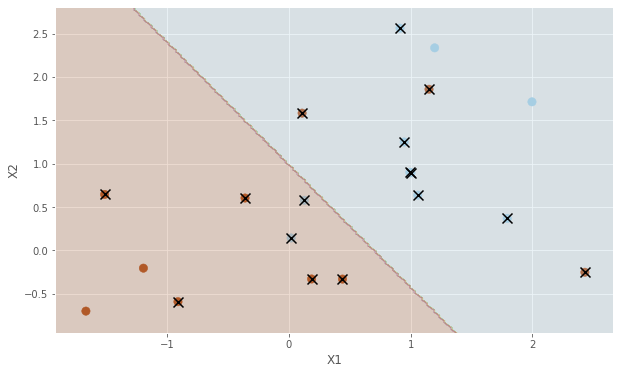

Number of support vectors: 16


In [9]:
plot_svc(svc2, X, y)

In [10]:
tuning = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]

In [11]:
clf = GridSearchCV(SVC(kernel = "linear"), tuning, cv = 10, scoring = "accuracy")
clf.fit(X, y)
pd.DataFrame(clf.cv_results_)[["mean_test_score", "std_test_score", "params"]]

,mean_test_score,std_test_score,params
0,0.80,0.244949,{'C': 0.001}
1,0.80,0.244949,{'C': 0.01}
2,0.80,0.244949,{'C': 0.1}
3,0.75,0.335410,{'C': 1}
4,0.75,0.335410,{'C': 5}
5,0.75,0.335410,{'C': 10}
6,0.75,0.335410,{'C': 100}


In [12]:
clf.best_params_

{'C': 0.001}

#### test

In [13]:
np.random.seed(1)
X_test = np.random.randn(20, 2)
y_test = np.random.choice([-1, 1], 20)
X_test[y_test == 1] = X_test[y_test == 1] - 1

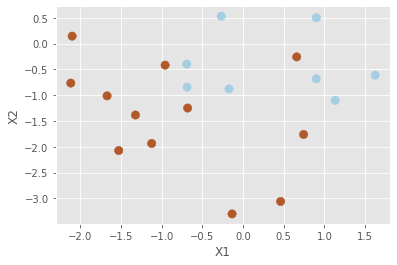

In [14]:
plt.scatter(X_test[:, 0], X_test[:, 1], s = 70, c = y_test, cmap = plt.cm.Paired)
plt.xlabel("X1"); plt.ylabel("X2")
plt.show()

C = 0.1

In [15]:
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index = svc2.classes_, columns = svc2.classes_)

,-1,1
-1,2,6
1,0,12


C = 0.001

In [16]:
svc3 = SVC(C = 0.001, kernel = "linear")
svc3.fit(X, y)

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index = svc3.classes_, columns = svc3.classes_)

,-1,1
-1,2,6
1,0,12


##### test seperable data with hyperplane

In [18]:
X_test[y_test == 1] = X_test[y_test == 1] -1

이전 형태에서 살짝 위치만 옮긴 거라 딱히 봐도 좋은 거 없음.

In [19]:
svc4 = SVC(C = 10, kernel = "linear")
svc4.fit(X_test, y_test)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

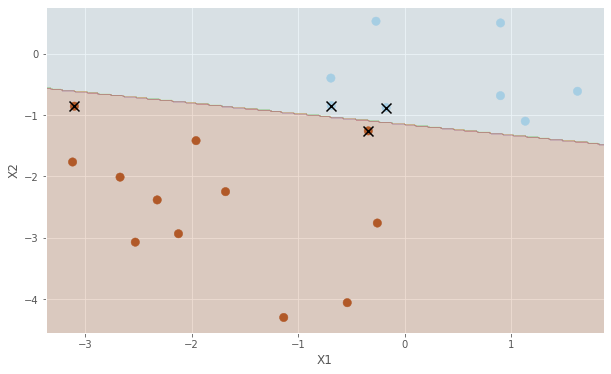

Number of support vectors: 4


In [20]:
plot_svc(svc4, X_test, y_test)

increase margin

In [21]:
svc5 = SVC(C = 1, kernel = "linear")
svc5.fit(X_test, y_test)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

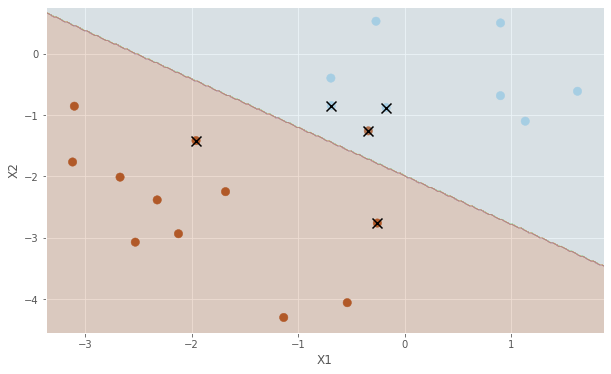

Number of support vectors: 5


In [22]:
plot_svc(svc5, X_test, y_test)

### **SVM: Support Vector Machine**

In [23]:
np.random.seed(8)
X = np.random.randn(200, 2)
X[:100] = X[:100] + 2
X[101:150] = X[101:150] - 2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1, 50)])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state = 2)

기본 모양 확인

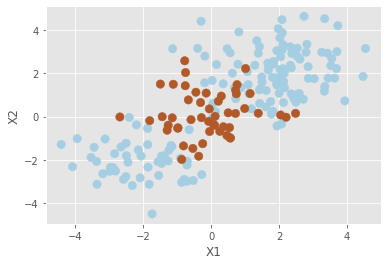

In [25]:
plt.scatter(X[:, 0], X[:, 1], s = 70, c = y, cmap = plt.cm.Paired)
plt.xlabel("X1"); plt.ylabel("X2")
plt.show()

svc (rbf kernel)

In [26]:
svm = SVC(gamma = 1)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

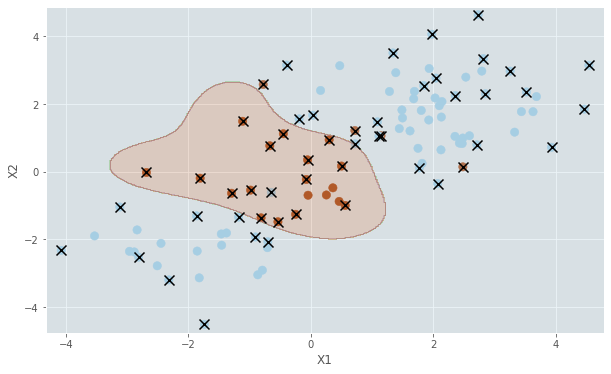

Number of support vectors: 51


In [27]:
plot_svc(svm, X_train, y_train)

increase C

In [28]:
svm2 = SVC(C = 100, gamma = 1)
svm2.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

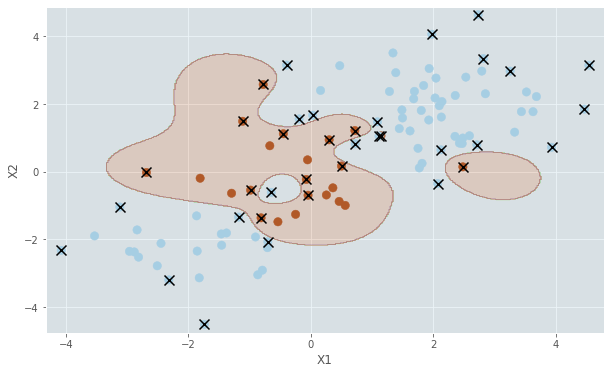

Number of support vectors: 36


In [29]:
plot_svc(svm2, X_train, y_train)

값이 달라져 버렸다. 근데 이유를 잘 모르겠다.<br />
decision_function_shape = None도, break_ties = True도 의미가 없어서 바뀌지가 않는다.

In [30]:
tuning = [{'C': [0.01, 0.1, 1, 10, 100], "gamma": [0.5, 1, 2, 3, 4]}]

In [31]:
clf = GridSearchCV(SVC(), tuning, cv = 10, scoring = "accuracy")
clf.fit(X_train, y_train)
pd.DataFrame(clf.cv_results_)[["mean_test_score", "std_test_score", "params"]].head(10)

,mean_test_score,std_test_score,params
0,0.77,0.045826,"{'C': 0.01, 'gamma': 0.5}"
1,0.77,0.045826,"{'C': 0.01, 'gamma': 1}"
2,0.77,0.045826,"{'C': 0.01, 'gamma': 2}"
3,0.77,0.045826,"{'C': 0.01, 'gamma': 3}"
4,0.77,0.045826,"{'C': 0.01, 'gamma': 4}"
5,0.77,0.045826,"{'C': 0.1, 'gamma': 0.5}"
6,0.77,0.045826,"{'C': 0.1, 'gamma': 1}"
7,0.77,0.045826,"{'C': 0.1, 'gamma': 2}"
8,0.77,0.045826,"{'C': 0.1, 'gamma': 3}"
9,0.77,0.045826,"{'C': 0.1, 'gamma': 4}"


In [32]:
clf.best_params_

{'C': 10, 'gamma': 0.5}

In [33]:
pd.DataFrame(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)))

,0,1
0,66,7
1,6,21


In [34]:
clf.best_estimator_.score(X_test, y_test)

0.87

#### SVM with Multiple Classes

In [35]:
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50, 2)])
yy = np.hstack([y, np.repeat(0, 50)])
XX[yy == 0] = XX[yy == 0] + 4

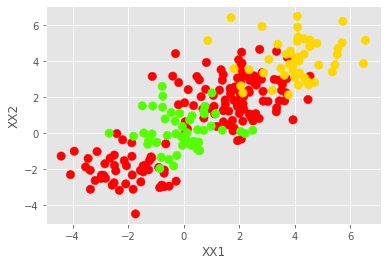

In [36]:
plt.scatter(XX[:, 0], XX[:, 1], s = 70, c = yy, cmap = plt.cm.prism)
plt.xlabel("XX1");  plt.ylabel("XX2")
plt.show()

In [37]:
svm3 = SVC(gamma = "auto")
svm3.fit(XX, yy)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

gamma default change<br />
"auto" -> "scale"

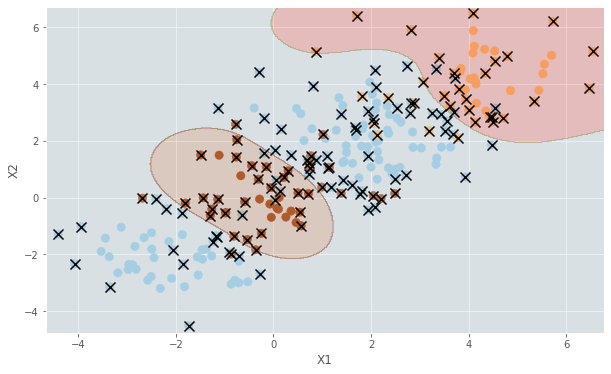

Number of support vectors: 133


In [38]:
plot_svc(svm3, XX, yy)

### **ROC Curves**
<li> 평소 같으면 함수화해서 스택 공간 차지도 줄였겠지만, 귀찮아.

In [39]:
svm4 = SVC(gamma = 2)
svm4.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

more flexible

In [40]:
svm5 = SVC(gamma = 50)
svm5.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

- train

In [41]:
y_train_score4 = svm4.decision_function(X_train)
y_test_score4 = svm4.decision_function(X_test)

In [42]:
train_false_pos4, train_true_pos4, _ = roc_curve(y_train, y_train_score4)
train_roc_auc4 = auc(train_false_pos4, train_true_pos4)

In [43]:
test_false_pos4, test_true_pos4, _ = roc_curve(y_test, y_test_score4)
test_roc_auc4 = auc(test_false_pos4, test_true_pos4)

- test

In [44]:
y_train_score5 = svm5.decision_function(X_train)
y_test_score5 = svm5.decision_function(X_test)

In [45]:
train_false_pos5, train_true_pos5, _ = roc_curve(y_train, y_train_score5)
train_roc_auc5 = auc(train_false_pos5, train_true_pos5)

In [46]:
test_false_pos5, test_true_pos5, _ = roc_curve(y_test, y_test_score5)
test_roc_auc5 = auc(test_false_pos5, test_true_pos5)

- graph

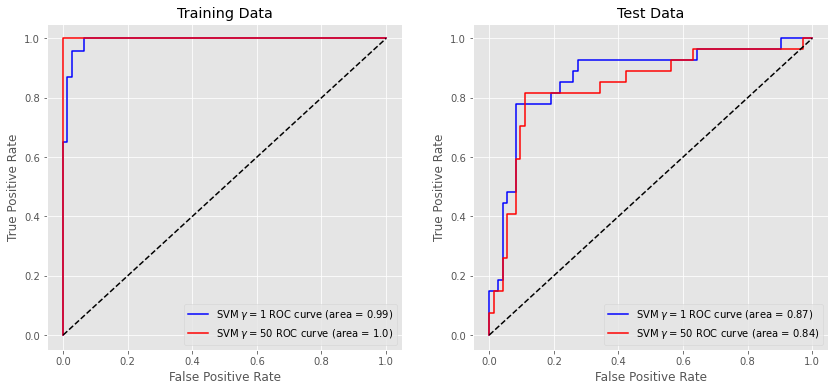

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))
ax1.plot(train_false_pos4, train_true_pos4, color = 'b',
         label = f"SVM $\gamma = 1$ ROC curve (area = {round(train_roc_auc4, 2)})")
ax1.plot(train_false_pos5, train_true_pos5, color = 'r',
         label = f"SVM $\gamma = 50$ ROC curve (area = {round(train_roc_auc5, 2)})")
ax1.set_title("Training Data")

ax2.plot(test_false_pos4, test_true_pos4, color = 'b',
         label = f"SVM $\gamma = 1$ ROC curve (area = {round(test_roc_auc4, 2)})")
ax2.plot(test_false_pos5, test_true_pos5, color = 'r',
         label = f"SVM $\gamma = 50$ ROC curve (area = {round(test_roc_auc5, 2)})")
ax2.set_title("Test Data")

for ax in fig.axes:
  ax.plot([0, 1], [0, 1], "k--")
  # ax.set_xlim([-0.05, 1]); ax.set_ylim([0, 1.05])
  ax.set_xlabel("False Positive Rate")
  ax.set_ylabel("True Positive Rate")
  ax.legend(loc = "lower right")
plt.show()

### Application to Gene Expression Data

In [48]:
khan = pd.read_csv("/content/drive/My Drive/ISLR/data/Khan.csv")
khan.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 2270,Unnamed: 2271,Unnamed: 2272,Unnamed: 2273,Unnamed: 2274,Unnamed: 2275,Unnamed: 2276,Unnamed: 2277,Unnamed: 2278,Unnamed: 2279,Unnamed: 2280,Unnamed: 2281,Unnamed: 2282,Unnamed: 2283,Unnamed: 2284,Unnamed: 2285,Unnamed: 2286,Unnamed: 2287,Unnamed: 2288,Unnamed: 2289,Unnamed: 2290,Unnamed: 2291,Unnamed: 2292,Unnamed: 2293,Unnamed: 2294,Unnamed: 2295,Unnamed: 2296,Unnamed: 2297,Unnamed: 2298,Unnamed: 2299,Unnamed: 2300,Unnamed: 2301,Unnamed: 2302,Unnamed: 2303,Unnamed: 2304,Unnamed: 2305,Unnamed: 2306,Unnamed: 2307,dataframe,tag
0,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,0.565427,1.499824,0.393595,1.625921,0.818193,0.010544,-0.545417,0.186563,1.264720,-1.046399,0.691696,0.912363,1.911126,-0.356247,0.737355,1.437605,1.488761,0.053636,1.265143,-0.712942,-0.076233,-0.627921,-0.049190,-3.184474,0.616482,0.784312,1.422120,-0.874429,-1.226559,-1.153280,-1.595042,...,-1.600478,0.208558,-2.683846,-0.553211,-3.540459,-0.077962,0.545807,-2.444149,-0.275753,-0.091019,-0.101590,-0.657780,0.679809,-1.193033,-0.703198,-0.109592,-1.078516,-2.247150,-0.742337,-4.074542,-0.489553,-0.843738,-2.168054,-1.909868,0.500836,-0.966269,-2.210918,-0.516006,-0.238511,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172,2,train
1,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,0.159053,1.145909,0.380694,1.556522,0.008167,0.158712,-0.274174,0.325411,1.647774,-1.299016,1.249787,0.548988,1.698236,-0.836556,-0.117883,1.620022,1.091252,-0.444726,1.330782,-0.631864,-0.366870,-1.340556,0.451903,-2.179483,-0.117658,0.559844,1.047179,0.553540,-1.052683,-0.045939,-1.935168,...,-0.380675,0.737786,-0.814411,-0.178290,-2.517017,0.449673,0.155892,-2.211831,0.118405,-0.594026,-0.290486,-0.530008,0.792540,-0.824624,-0.165464,-0.884066,0.131028,-0.549393,0.046215,-3.467337,-0.754597,0.314007,-0.649896,-2.442997,-1.357901,-0.190676,-2.787093,-1.208650,-0.657394,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395,2,train
2,-0.084469,-1.649739,-0.241307,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,0.496585,1.388741,-0.530688,1.614903,-0.208009,0.079273,-0.537341,0.004390,1.472311,-0.904362,0.693697,0.320415,1.571881,-1.093326,0.532861,1.503455,1.503388,-0.130792,1.016679,-0.507996,0.066630,-0.673933,0.314665,-2.144727,0.247719,0.942855,1.048406,-0.291824,-1.753886,-0.514332,-1.383498,...,-0.949072,-0.173045,-0.006320,-0.459024,-2.599644,-0.005817,0.653418,-2.405726,-0.240035,-1.438852,0.266893,-1.055553,0.353119,-0.704815,-0.292226,-0.974980,-0.037183,-0.130678,-0.353537,-1.047824,-1.151380,-0.227026,-0.565458,-2.469821,-0.559491,-0.802516,-2.515778,-0.771325,-0.696352,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434,2,train
3,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,0.994732,1.014832,0.082501,1.047600,0.972028,-0.170788,-0.043847,-0.425413,0.452857,-0.680231,0.393865,0.714762,1.115732,0.287132,0.572335,0.928575,1.069836,0.316270,-0.089050,0.074087,-0.077205,0.138892,-0.484995,0.722852,0.910554,0.997244,0.586508,-0.720313,-0.082078,-0.937770,-0.338134,...,-0.515168,-0.453501,-0.148732,-0.265399,-1.666538,-0.263966,0.913326,-1.181233,-0.759714,0.182905,0.504103,-0.741707,0.079827,-0.691349,0.111899,-1.223156,-1.001304,-1.975442,-0.798063,-2.246205,0.383901,-0.671190,-1.447319,-0.448790,1.038721,-0.727118,-1.176358,-0.044788,0.259746,0.357115,-1.893128,

##### 분리 및 데이터 확인

In [49]:
X_train = khan[khan.tag == "train"].drop(["dataframe", "tag"], axis = 1)
X_test = khan[khan.tag == "test"].drop(["dataframe", "tag"], axis = 1)
y_train = khan.loc[khan.tag != "test", "dataframe"]
y_test = khan.loc[khan.tag != "train", "dataframe"]

In [50]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(63, 2308) (20, 2308) (63,) (20,)


In [51]:
pd.Series(y_train).value_counts()

2    23
4    20
3    12
1     8
Name: dataframe, dtype: int64

In [52]:
pd.Series(y_test).value_counts()

3    6
2    6
4    5
1    3
Name: dataframe, dtype: int64

##### modeling

In [53]:
svc = SVC(kernel = "linear")
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

training error ratio

In [54]:
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index = svc.classes_, columns = svc.classes_)
cm_df.index.name = "Predicted"
cm_df.columns.name = "True"
cm_df

True,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


test error ratio

In [55]:
cm = confusion_matrix(y_test, svc.predict(X_test))
cm_df = pd.DataFrame(cm.T, index = svc.classes_, columns = svc.classes_)
cm_df.index.name = "Predicted"
cm_df.columns.name = "True"
cm_df

True,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5
